# EDA

> 변수
- goods : 상품이름
- brand : 브랜드
- price : 가격
- review_count : 리뷰 수

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format # 소수점 2자리까지 표현

%matplotlib inline

In [2]:
musinsa_data = pd.read_excel('Musinsa_Data.xlsx').iloc[:,1:]

In [3]:
musinsa_data

,goods,brand,price,review_count
0,캐시미어 더블 롱 코트 BLACK,인사일런스,"289,000","8,526"
1,[이동휘 착용][3M 신슐레이트]오리지널 M-1965 피쉬테일 파카_Original...,라퍼지스토어,"138,000","6,446"
2,MTR 오버핏 더블 롱 코트 (블랙),쿠어,"334,000","5,255"
3,[PRAUDEN] 유틸리티 덕다운 푸파 숏패딩_라이트그레이,코드그라피,"124,000","1,870"
4,울리치 트렌치 맥코트_Black,라퍼지 포 우먼,"163,000","2,444"
...,...,...,...,...
895,울리치 오버핏 블루종 점퍼_Black,라퍼지스토어,"108,000",39
896,비전3 봄버 다운 자켓 YELLOW,코닥,"419,000",6
897,[3M 신슐레이트]쉬링 피셔맨 패딩_Gray,라퍼지스토어,"114,000",20
898,ECO LEATHER SINGLE BREASTED BLAZER BROWN,프렌다,"169,000",10


## DataFrame

In [4]:
data = musinsa_data.copy()

In [5]:
data.shape

(900, 4)

In [6]:
data.columns

Index(['goods', 'brand', 'price', 'review_count'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   goods         900 non-null    object
 1   brand         900 non-null    object
 2   price         900 non-null    object
 3   review_count  823 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB


In [8]:
# 결측값 수 확인
columns = data.columns
for column in columns:
    print("{}'s null count : {}".format(column,data[column].isnull().sum()))

goods's null count : 0
brand's null count : 0
price's null count : 0
review_count's null count : 77


In [9]:
# review_count의 null값은 0
data.loc[data['review_count'].isnull(),'review_count'] = 0

In [10]:
# review_count의 null값 0으로 바꾼 후 결측값 수 확인
columns = data.columns
for column in columns:
    print("{}'s null count : {}".format(column,data[column].isnull().sum()))

goods's null count : 0
brand's null count : 0
price's null count : 0
review_count's null count : 0


In [11]:
# price, review_count -> int형으로
for i in range(len(data['price'])):
    data.loc[i,'price'] = str(data.loc[i,'price']).replace(',','')
    data.loc[i,'review_count'] = str(data.loc[i,'review_count']).replace(',','')

data['price'] = data['price'].astype(int)
data['review_count'] = data['review_count'].astype(int)

In [12]:
goods = data.loc[:,'goods']
brand = data.loc[:,'brand']
price = data.loc[:,'price']
review_count = data.loc[:,'review_count']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   goods         900 non-null    object
 1   brand         900 non-null    object
 2   price         900 non-null    int32 
 3   review_count  900 non-null    int32 
dtypes: int32(2), object(2)
memory usage: 21.2+ KB


In [14]:
data.describe()

,price,review_count
count,900.00,900.00
mean,231447.00,709.40
std,151127.11,2893.25
min,29900.00,0.00
25%,139900.00,7.00
50%,199000.00,32.00
75%,289000.00,209.25
max,1880000.00,40293.00


## goods
- 상품명

In [15]:
# 겹치는 상품명 없음
goods.value_counts()

WARM UP QUILTING JACKET IVORY              1
LONELY/LOVELY ZIP-UP HOODIE BLACK          1
U마카롱후디자켓 CM                                1
CORDUROY VARSITY JACKET _ NAVY             1
3M 신슐레이트 퀼팅 롱 패딩 블랙                        1
                                          ..
CASHMERE BLENDED ROUND CARDIGAN IVORY      1
[3M 신슐레이트]쉬링 피셔맨 패딩_Gray                   1
울리치 오버핏 블루종 점퍼_Black                       1
cold weather down parka orange             1
Oversized hooded Puffer Down Light Gray    1
Name: goods, Length: 900, dtype: int64

In [16]:
# 검은색, 회색, 하얀색 옷의 갯수 확인
# 옷 이름에 색이 언급된 수임
# 모든 옷의 색을 반영하지는 못함
black_cnt = 0
white_cnt = 0
grey_cnt = 0
for i in range(len(goods)):
    if ('검은' in goods[i]) or ('검정' in goods[i]) or ('BLACK' in goods[i]) or ('Black' in goods[i]) or ('블랙' in goods[i]):
        black_cnt += 1
    elif ('흰' in goods[i]) or ('하얀' in goods[i]) or ('WHITE' in goods[i]) or ('White' in goods[i]) or ('화이트' in goods[i]):
        white_cnt += 1
    elif ('회색' in goods[i]) or ('Grey' in goods[i]) or ('GREY' in goods[i]) or ('그레이' in goods[i]):
        grey_cnt += 1

print('검정 아우터 수 : {}'.format(black_cnt))
print('흰색 아우터 수 : {}'.format(white_cnt))
print('회색 아우터 수 : {}'.format(grey_cnt))

검정 아우터 수 : 319
흰색 아우터 수 : 17
회색 아우터 수 : 95


## price
- 분포 확인 -> transformation?
- 이상치 확인

In [17]:
price.describe()

count       900.00
mean     231447.00
std      151127.11
min       29900.00
25%      139900.00
50%      199000.00
75%      289000.00
max     1880000.00
Name: price, dtype: float64

### histogram & boxplot

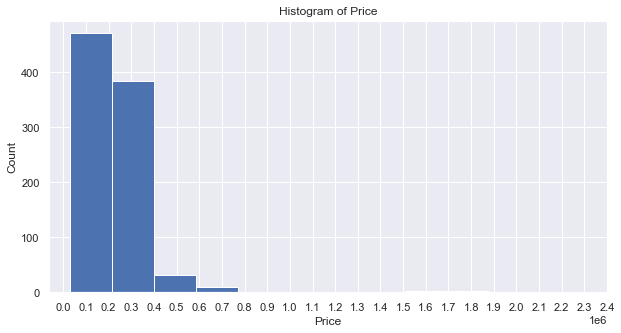

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(price)
plt.xticks(range(0, 2500000,100000))

plt.title('Histogram of Price')
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

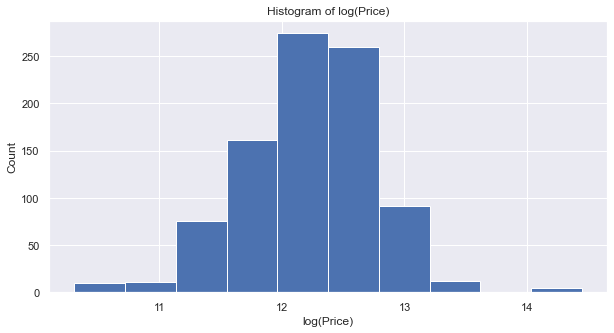

In [20]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(np.log(price))

plt.title('Histogram of log(Price)')
plt.ylabel('Count')
plt.xlabel('log(Price)')
plt.show()

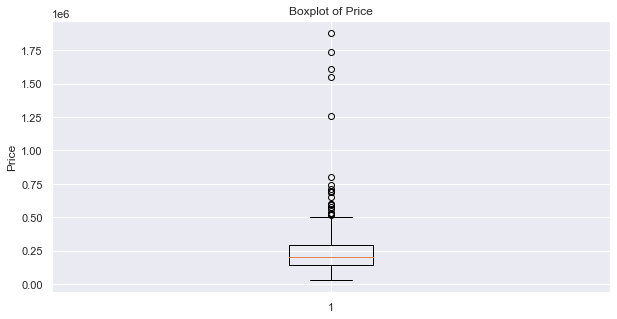

In [21]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.boxplot(price)

plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

### outliers

In [22]:
# IQR기반한 outliers
def detect_outliers(df, feature):
    outlier_indices = [] 
    Q1 = np.percentile(df[feature], 25) 
    Q3 = np.percentile(df[feature], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR 
    outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [23]:
# 가격이 outlier인 상품들
price_outlier_indices = detect_outliers(data, 'price')
data.iloc[price_outlier_indices, :]

,goods,brand,price,review_count
37,DV.LOT 657 SHADOW B-3 Mouton Jacket -Plain- 21...,디아프바인,1740000,6
46,[21FW]여성 스틸링 파카 / MK2003LP 291,무스너클,1612000,0
102,남성 겨울 스윙 다운 점퍼-PFWPM630601,피엑스지,799000,0
106,남성 4바 숏 울 브이넥 가디건 - 네이비 / MKC353A01085415,톰브라운,1550000,1
112,스틸링 파카 / MK4661MP-290,무스너클,1260000,46
123,남성 스틸링 블랙 폭스 퍼 파카 - 블랙 / MK4661MP291,무스너클,1880000,0
126,MK로고 리버시블 메탈릭 덕 다운 자켓,마이클코어스,710000,0
127,DV.LOT 653 Lamb skin Duck down-Armor 360g,디아프바인,698000,13
130,베르겐 고어 구스다운 남성 롱패딩 (BLACK),디스커버리 익스페디션,690000,8
131,베르겐 고어 구스다운 남성 롱패딩 (D/IVORY),디스커버리 익스페디션,690000,0


In [24]:
data_rm_outliers = data.copy()
data_rm_outliers = data_rm_outliers.drop(price_outlier_indices, axis = 0).reset_index(drop=True)
data_rm_outliers

,goods,brand,price,review_count
0,캐시미어 더블 롱 코트 BLACK,인사일런스,289000,8526
1,[이동휘 착용][3M 신슐레이트]오리지널 M-1965 피쉬테일 파카_Original...,라퍼지스토어,138000,6446
2,MTR 오버핏 더블 롱 코트 (블랙),쿠어,334000,5255
3,[PRAUDEN] 유틸리티 덕다운 푸파 숏패딩_라이트그레이,코드그라피,124000,1870
4,울리치 트렌치 맥코트_Black,라퍼지 포 우먼,163000,2444
...,...,...,...,...
874,울리치 오버핏 블루종 점퍼_Black,라퍼지스토어,108000,39
875,비전3 봄버 다운 자켓 YELLOW,코닥,419000,6
876,[3M 신슐레이트]쉬링 피셔맨 패딩_Gray,라퍼지스토어,114000,20
877,ECO LEATHER SINGLE BREASTED BLAZER BROWN,프렌다,169000,10


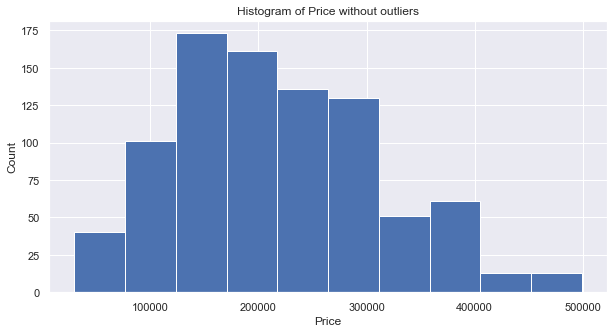

In [25]:
# 이상치 삭제한 후 histogram
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(data_rm_outliers['price'])

plt.title('Histogram of Price without outliers')
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

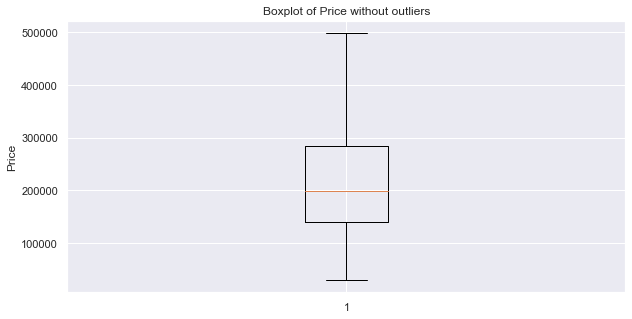

In [26]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.boxplot(data_rm_outliers['price'])

plt.title('Boxplot of Price without outliers')
plt.ylabel('Price')
plt.show()

## Brand
- 몇몇 브랜드들이 비교적 많기는 하지만 독점처럼은 보이지 않는다.

In [27]:
# 브랜드별 제품 갯수
# pd.value_counts?
pd.value_counts(brand)

무신사 스탠다드          58
커버낫               35
내셔널지오그래픽          34
라퍼지스토어            34
디스커버리 익스페디션       33
                  ..
에스티피크니커            1
척                  1
씨클로버               1
5252 바이 오아이오아이     1
넌블랭크               1
Name: brand, Length: 250, dtype: int64

In [28]:
(pd.value_counts(brand)>=5).sum()

42

In [29]:
# 브랜드별 제품 퍼센트
round(pd.value_counts(brand, normalize=True)*100,2)

무신사 스탠다드         6.44
커버낫              3.89
내셔널지오그래픽         3.78
라퍼지스토어           3.78
디스커버리 익스페디션      3.67
                 ... 
에스티피크니커          0.11
척                0.11
씨클로버             0.11
5252 바이 오아이오아이   0.11
넌블랭크             0.11
Name: brand, Length: 250, dtype: float64

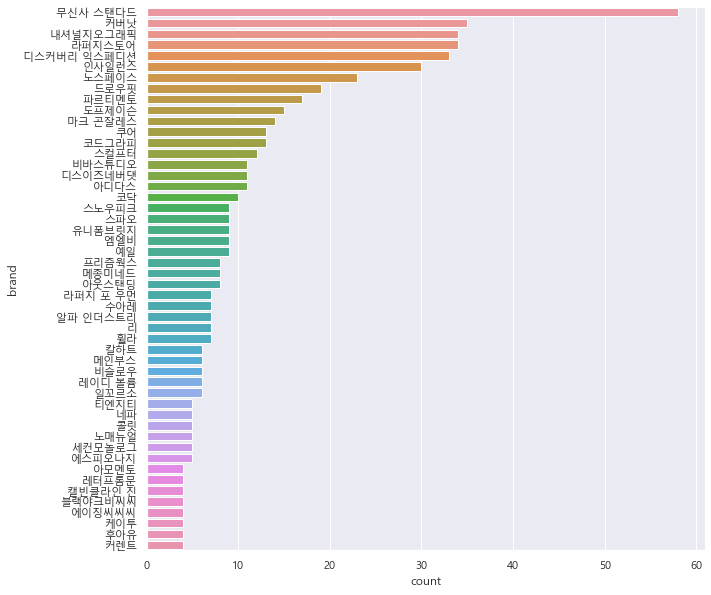

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 50개만
sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 깨짐 해결

plt.figure(figsize = (10,10))
sns.countplot(y='brand',
              data=data,
              order = brand.value_counts().iloc[:50].index) # 상위 50개만 표시
plt.show()

## review_counts
- 분포 확인 -> transformation?
- 이상치 확인
- 이상치를 삭제해도 편향된 그래프를 그림

In [32]:
review_count.describe()

count     900.00
mean      709.40
std      2893.25
min         0.00
25%         7.00
50%        32.00
75%       209.25
max     40293.00
Name: review_count, dtype: float64

### histogram & boxplot

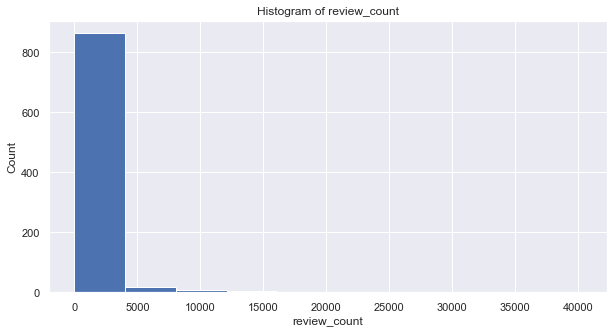

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(review_count)

plt.title('Histogram of review_count')
plt.ylabel('Count')
plt.xlabel('review_count')
plt.show()

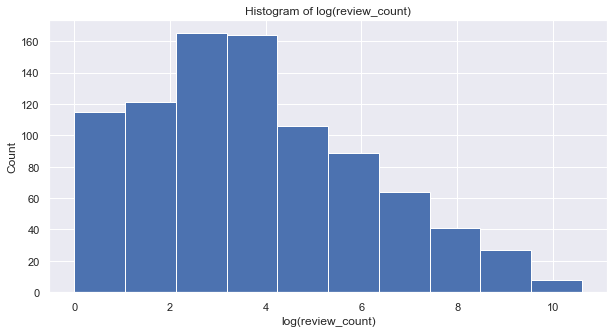

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(np.log(review_count+1)) # 0인 값이 있어서 +1 해줌

plt.title('Histogram of log(review_count)')
plt.ylabel('Count')
plt.xlabel('log(review_count)')
plt.show()

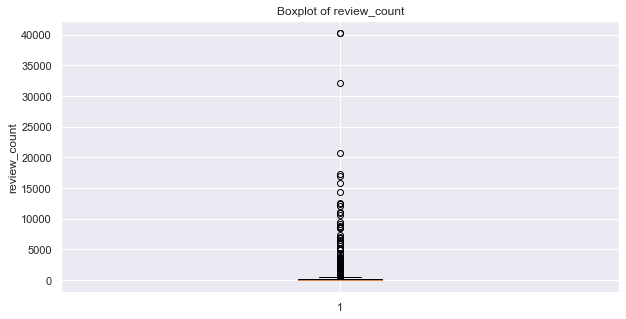

In [35]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.boxplot(review_count)

plt.title('Boxplot of review_count')
plt.ylabel('review_count')
plt.show()

### outliers

In [36]:
# IQR기반한 outliers
def detect_outliers(df, feature):
    outlier_indices = [] 
    Q1 = np.percentile(df[feature], 25) 
    Q3 = np.percentile(df[feature], 75) 
    IQR = Q3 - Q1 
    outlier_step = 1.5 * IQR 
    outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [37]:
# 가격이 outlier인 상품들
review_outlier_indices = detect_outliers(data, 'review_count')
data.iloc[review_outlier_indices, :]

,goods,brand,price,review_count
0,캐시미어 더블 롱 코트 BLACK,인사일런스,289000,8526
1,[이동휘 착용][3M 신슐레이트]오리지널 M-1965 피쉬테일 파카_Original...,라퍼지스토어,138000,6446
2,MTR 오버핏 더블 롱 코트 (블랙),쿠어,334000,5255
3,[PRAUDEN] 유틸리티 덕다운 푸파 숏패딩_라이트그레이,코드그라피,124000,1870
4,울리치 트렌치 맥코트_Black,라퍼지 포 우먼,163000,2444
...,...,...,...,...
859,[매트블랙] 버핑레더 라이더자켓_Matt Black,라퍼지스토어,94000,760
862,리버시블 플리스 집업 자켓 블랙,커버낫,129000,827
871,2WAY 스냅 블루종_아이보리,아르반,136000,1777
880,워싱 코튼 셰르파 자켓 (Black),더스토리,89000,696


In [38]:
data_rm_outliers = data.copy()
data_rm_outliers = data_rm_outliers.drop(review_outlier_indices, axis = 0).reset_index(drop=True)
data_rm_outliers

,goods,brand,price,review_count
0,[PRAUDEN] 유틸리티 덕다운 후드 숏패딩_블랙,코드그라피,144000,301
1,오리지널 헤비 덕다운 M-1990 스웨덴 파카_Black,라퍼지스토어,186000,16
2,[이도현 착용]RDS 유틸리티 다운 점퍼 블랙,커버낫,269000,79
3,MTR 발마칸 코트 (딥브라운),쿠어,329000,398
4,오버사이즈 멜톤 더플 롱 코트 네이비,파르티멘토,155000,1
...,...,...,...,...
748,울리치 오버핏 블루종 점퍼_Black,라퍼지스토어,108000,39
749,비전3 봄버 다운 자켓 YELLOW,코닥,419000,6
750,[3M 신슐레이트]쉬링 피셔맨 패딩_Gray,라퍼지스토어,114000,20
751,ECO LEATHER SINGLE BREASTED BLAZER BROWN,프렌다,169000,10


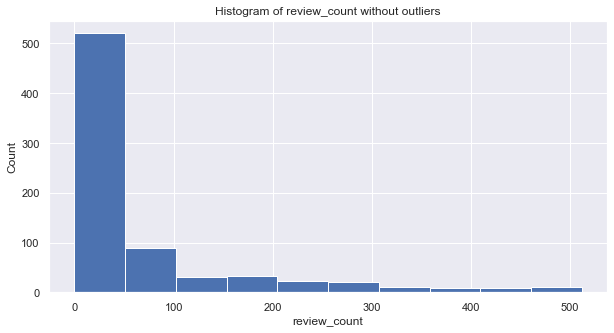

In [39]:
# 이상치 삭제한 후 histogram
# 이상치를 삭제해도 편향된 그래프를 그림
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(data_rm_outliers['review_count'])

plt.title('Histogram of review_count without outliers')
plt.ylabel('Count')
plt.xlabel('review_count')
plt.show()

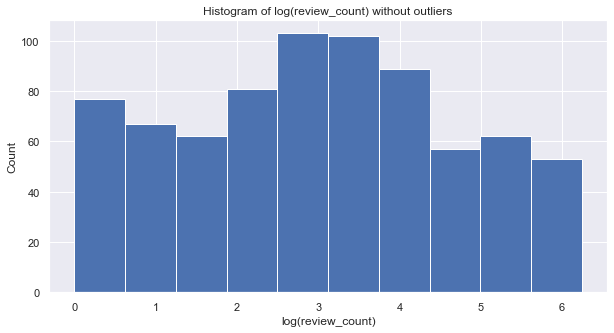

In [40]:
# 이상치 삭제, log transformation한 후 histogram
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))

plt.hist(np.log(data_rm_outliers['review_count']+1))

plt.title('Histogram of log(review_count) without outliers')
plt.ylabel('Count')
plt.xlabel('log(review_count)')
plt.show()

# 상관관계(correlation)
- 가격과 리뷰의 수가 상관성이 없게 나온다.
- 이상치의 영향일 수 있으므로 이상치 제거 후 다시 확인.
- 이상치 제거 후에도 상관계수가 -0.30이다 -> 가격과 리뷰 수에는 큰 상관성이 없는 것처럼 보인다.


In [41]:
# 상관계수
data.corr()

,price,review_count
price,1.00,-0.18
review_count,-0.18,1.00


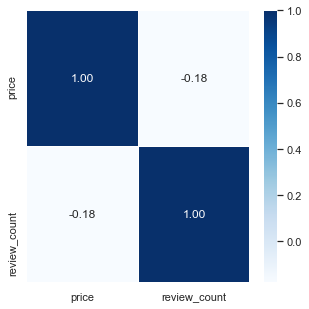

In [42]:
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(5,5))
sns.heatmap(data = data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [43]:
# 위에서 구한 IQR 기준 outliers들 제거
outlier_indices = []
outlier_indices.extend(review_outlier_indices)
outlier_indices.extend(price_outlier_indices)
outlier_indices = set(outlier_indices)

data_rm_outliers = data.copy()
data_rm_outliers = data_rm_outliers.drop(outlier_indices, axis = 0).reset_index(drop=True)
data_rm_outliers

,goods,brand,price,review_count
0,[PRAUDEN] 유틸리티 덕다운 후드 숏패딩_블랙,코드그라피,144000,301
1,오리지널 헤비 덕다운 M-1990 스웨덴 파카_Black,라퍼지스토어,186000,16
2,[이도현 착용]RDS 유틸리티 다운 점퍼 블랙,커버낫,269000,79
3,MTR 발마칸 코트 (딥브라운),쿠어,329000,398
4,오버사이즈 멜톤 더플 롱 코트 네이비,파르티멘토,155000,1
...,...,...,...,...
727,울리치 오버핏 블루종 점퍼_Black,라퍼지스토어,108000,39
728,비전3 봄버 다운 자켓 YELLOW,코닥,419000,6
729,[3M 신슐레이트]쉬링 피셔맨 패딩_Gray,라퍼지스토어,114000,20
730,ECO LEATHER SINGLE BREASTED BLAZER BROWN,프렌다,169000,10


In [44]:
# 이상치 제거 후 상관계수
data_rm_outliers.corr()

,price,review_count
price,1.00,-0.33
review_count,-0.33,1.00


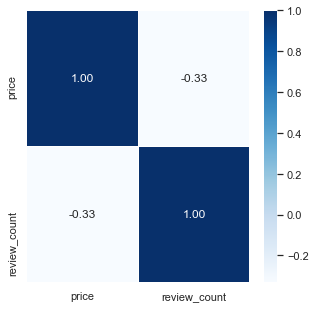

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(5,5))
sns.heatmap(data = data_rm_outliers.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()